<a href="https://colab.research.google.com/github/arturovallemacias/diffusion_models/blob/main/forward_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

In [54]:
n_samples = 10000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2,0]] /10
data = data * np.array([1, -1])

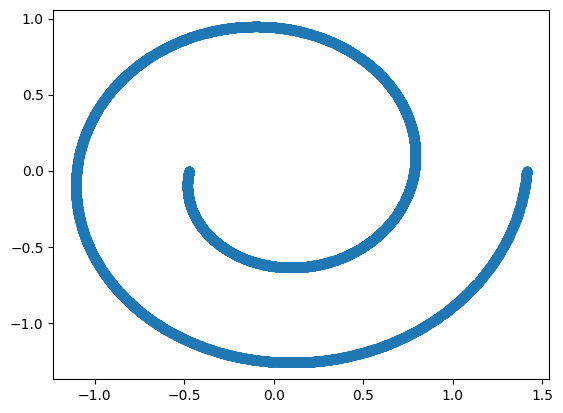

In [55]:
plt.scatter(data[:,0], data[:,1])

In [56]:
torch.set_printoptions(precision=5, sci_mode=False)
def forward_process(data, T, betas):

    for t in range(T):
        beta_t = betas[t]
        mu = data *torch.sqrt(1 - beta_t)
        std = torch.sqrt(beta_t)
        data = mu + torch.randn_like(data) * std

    return data

In [57]:
T = 40
betas = torch.sigmoid(torch.linspace(-18,10,T))* (3e-1 - 1e-5) + 1e-5
xT = forward_process(torch.from_numpy(data), T, betas)


In [58]:
print(xT.mean(0))
print(xT.std(0))

tensor([ 0.01607, -0.01928], dtype=torch.float64)
tensor([0.99836, 1.01096], dtype=torch.float64)


(-2.0, 2.0)

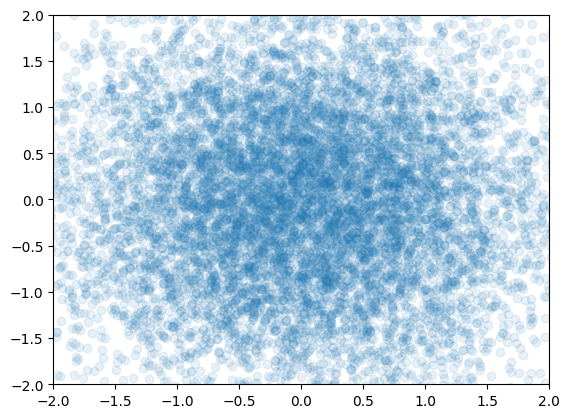

In [59]:
plt.scatter(xT[:, 0].data.numpy(), xT[:,1].data.numpy(), alpha=0.1)
plt.xlim([-2,2])
plt.ylim([-2,2])
